## Downloading a polygon for another location and getting its NDVI data

### Step 1: Set up
Load libraries

In [16]:
### vector data
import geopandas as gpd
import pandas as pd

### raster data
import rioxarray as rxr
import xarray as xr

### maps and plots
import holoviews as hv
import hvplot.pandas
import hvplot.xarray

### open street map
from osmnx import features as osm
import osmnx as ox

### file structure
import os
import pathlib

### earthpy
import earthpy
import earthpy.api.appeears as eaapp

In [19]:
### set up project
project = earthpy.Project("Gila River Vegetation", dirname = 'pt_reyes_ndvi')
# project = earthpy.Project("Gila River Vegetation", dirname = 'gila-vegetation-data')


project.get_data()

Extracted output to /workspaces/data/pt_reyes_ndvi/tl_2020_us_aitsn
Extracted output to /workspaces/data/pt_reyes_ndvi/gila-river-ndvi


## Step 2: Get polygon for area of interest
Go to [Open Street Maps](https://www.openstreetmap.org/#map=4/38.01/-95.84) and search for your area of interest to see how it's labeled.

Example: Point Reyes National Seashore (not stored as an address in OSM)


In [6]:
### search for PRNS
reyes_gdf = ox.geocode_to_gdf(
    'Point Reyes National Seashore')

### check it out
reyes_gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-123.02863 37.99505, -123.0286...",-123.028632,37.896415,-122.701214,38.244664,297422858,relation,1250137,38.070532,-122.917612,boundary,protected_area,25,0.384603,protected_area,Point Reyes National Seashore,"Point Reyes National Seashore, Marin County, C..."


<Axes: >

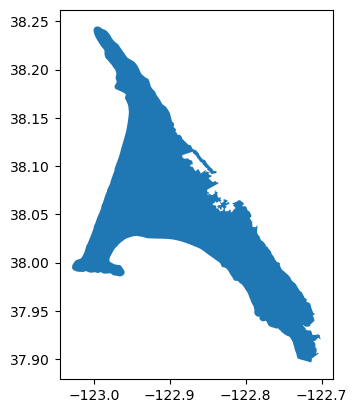

In [ ]:
### make a quick plot
reyes_gdf.plot()

## Step 3: Get NDVI for area of interest

In [22]:
### initialize AppeearsDownloader for MODIS NDVI data
ndvi_downloader = eaapp.AppeearsDownloader(
    download_key="reyes_ndvi",
    project=project,
    product='MOD13Q1.061',
    layer='_250m_16_days_NDVI',
    start_date="01-01",
    end_date="09-31",
    recurring=True,
    year_range=[2015, 2016],
    polygon=reyes_gdf
)

In [23]:
### download the prepared download -- this can take some time!
ndvi_downloader.download_files(cache=True)

Credentials found using 'env' backend.


HTTPError: 401 Client Error: UNAUTHORIZED for url: https://appeears.earthdatacloud.nasa.gov/api/login